In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import learning_curve



In [2]:
df = pd.read_csv('C:/Maestría Inteligencia artificial aplicada/Trimestre 7 (Proyecto integrador y TD)/Semana 6/Alhajas/new_df_afterPCA_alhajas.csv')

In [3]:
df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,...,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9,DIAS_ALMONEDA
0,0.812735,-1.814181,0.638738,1.484528,-1.233439,-0.566588,0.414354,-2.021052,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31
1,-0.890791,-1.612409,0.763566,1.539948,-1.102550,-0.441027,0.512508,-1.224245,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31
2,1.301319,-1.706775,0.827715,1.745161,-1.068129,-0.316375,-0.516893,-2.344264,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31
3,-3.590642,-0.706322,-0.800961,0.025471,-0.954515,-1.206674,4.279983,-3.877298,0.0,0.0,...,0,0,0,0,0,0,0,1,0,21
4,-6.868838,-0.830656,-0.449515,0.318054,-0.546366,-0.827182,3.805191,-0.950972,0.0,0.0,...,0,0,0,0,0,0,0,1,0,21


In [4]:
df.shape

(679164, 144)

Comentarios: A continuación vamos a particionar el dataframe en los datos que van a entrenar el modelo, validar y el testing. Como primer paso dejamos la variable objetivo a parte del dataframe de variables predictoras.

In [5]:
X = df.drop(df[['DIAS_ALMONEDA']],axis=1)
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,...,VALUADOR_0,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9
0,0.812735,-1.814181,0.638738,1.484528,-1.233439,-0.566588,0.414354,-2.021052,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.890791,-1.612409,0.763566,1.539948,-1.102550,-0.441027,0.512508,-1.224245,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.301319,-1.706775,0.827715,1.745161,-1.068129,-0.316375,-0.516893,-2.344264,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,-3.590642,-0.706322,-0.800961,0.025471,-0.954515,-1.206674,4.279983,-3.877298,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,-6.868838,-0.830656,-0.449515,0.318054,-0.546366,-0.827182,3.805191,-0.950972,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679159,2.719733,-1.087779,1.926290,-0.397498,0.247639,0.766519,-0.889125,-0.653163,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
679160,2.449231,0.059689,-0.171508,-1.914994,1.259741,1.038081,0.392547,0.047670,0.0,0.0,...,0,0,0,1,1,0,0,1,1,1
679161,3.194923,1.025713,0.940067,-1.991741,0.057458,-0.345534,-0.358578,0.018728,0.0,0.0,...,0,0,1,0,1,1,1,0,1,0
679162,1.297617,0.189724,-0.649046,0.326053,0.180996,1.043675,-0.090841,0.051932,0.0,0.0,...,0,1,0,1,1,0,1,1,1,0


In [21]:
y =df[['DIAS_ALMONEDA']].copy()
y

,DIAS_ALMONEDA
0,31
1,31
2,31
3,21
4,21
...,...
679159,20
679160,111
679161,26
679162,347


A continuación vamos a realizar una partición 70-15-15 en entrenamiento, validación y prueba respectivamente.

In [7]:
Xtrain, xtemp, ytrain, ytemp = train_test_split(X, y, test_size =.30)
Xval,Xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size= 0.5)

In [8]:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(475414, 143) (475414,)
(101875, 143) (101875,)
(101875, 143) (101875,)


Comentarios. Como primer propuesta vamos a entrenar y evaluar un modelo de regresión lineal y podremos revisar si sus métricas son adecuadas

Vamos a evaluar el modelo con las métricas,raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$).

In [9]:
lr_model = LinearRegression()
lr_model.fit(Xtrain,ytrain)
y_prediction = lr_model.predict(Xval)

In [10]:
mse = mean_squared_error(yval,y_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(yval,y_prediction)
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2: {r2:.4f}')

MSE: 6103.8838
RMSE: 78.1274
R2: 0.5162


Podemos observar que la regresión lineal obtuvo una R^2 baja, de .51, muy por debajo de 1.  Vamos a analizar con diferentes modelos para mejorar nuestra métrica

Vamos a utilizar validación-cruzada, por lo que vamos a concatenar los conjuntos de entrenamiento y validación para utilizarlo como entrenamiento

In [11]:
Xtrainval = pd.concat([Xtrain,Xval],axis =0)
ytrainval = pd.concat([ytrain,yval],axis=0)

In [12]:
print(Xtrainval.shape, ytrainval.shape)

(577289, 143) (577289,)


Posterior a esto, vamos a proponer una función llamada "mis modelos" incluyendo los modelos que vamos a comparar y vamos a ajustar los parámetros para buscar el mejor modelo

In [ ]:
def mis_modelos():
    modelos, nombres = list(), list()

    #ElasticNet
    modelos.append(ElasticNet(alpha=0.01, l1_ratio=0.5, tol=0.01,max_iter=1000))
    nombres.append('ElasticNet')

    #Árbol de Decisiones
    modelos.append(DecisionTreeRegressor(max_depth=15,max_features=5, min_samples_split=5))
    nombres.append('Dtree')
##
    ###Random Forest
    modelos.append(RandomForestRegressor(n_estimators=7, max_features=5, max_depth=5,min_samples_split=0.01))
    nombres.append('RandomF')
##
    ###XGBoosting
    modelos.append(XGBRegressor(booster='gbtree',n_estimators=330, max_depth=9,learning_rate=0.1,subsample=1.0,objective= 'reg:squarederror',reg_alpha=0.8,reg_lambda=1.0,colsample_bytree=0.9,colsample_bylevel=0.9))
    nombres.append('XGBoost')
##
    ###Red neuronal de Perceptrón Muliticapa:
    modelos.append(MLPRegressor(hidden_layer_sizes=(400,),activation='relu',max_iter=12,alpha=0.0001,learning_rate='constant'))
    nombres.append('MLP')
    
    #Máquina de Vectores de Soporte:
    #modelos.append(SVR(kernel='rbf',C=1.0,gamma='scale',epsilon=0.1))#random_state=27))
    #nombres.append('SVM')

    return modelos, nombres

#Posteriormente vamos a entrenar cada uno de los modelos y vamos a desplegar las métricas de Train y val

modelos, nombres = mis_modelos()
resultados =list()

micv = RepeatedKFold(n_splits=5,n_repeats=2)

for modelo, nombre in zip(modelos,nombres):
    pipeline = Pipeline(steps=[('m',modelo)])


    #Se lleva a cabo el entrenamiento
    scores = cross_validate(pipeline,
                            Xtrainval,
                            ytrainval,
                            scoring={'r2':'r2', 'rmse': 'neg_root_mean_squared_error'},
                            cv=micv,
                            return_train_score=True,
                            n_jobs=1)
    #Se guarda el resultado de cada modelo
    resultados.append(scores)

    #Desplegamos los valores de las métricas para verificar si no hay subentrenamiento o sobreentrenamiento
    print(f">> {nombre}")
    print(f"\tTrain R2: {np.mean(scores['train_r2']):.3f} ± {np.std(scores['train_r2']):.3f}")
    print(f"\tVal   R2: {np.mean(scores['test_r2']):.3f} ± {np.std(scores['test_r2']):.3f}")
    print(f"\tTrain RMSE: {-np.mean(scores['train_rmse']):.3f} ± {np.std(scores['train_rmse']):.3f}")
    print(f"\tVal RMSE: {-np.mean(scores['test_rmse']):.3f} ± {np.std(scores['test_rmse']):.3f}")


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't 

>> MLP
	Train R2: 0.730 ± 0.003
	Val   R2: 0.724 ± 0.006
	Train RMSE: 59.050 ± 0.362
	Val RMSE: 59.697 ± 0.820


Posterior, vamos a realizar un Randomized Search para buscar los mejores hiperparámetros del modelo del XGboost Regressor que actualmente cuenta con una R^2 de 0.71

XGBoost

In [14]:
param_dist_final_tune_xgboost = {
    'n_estimators': [100,200,300,400],
    'max_depth':[10,20,25,30,50],
    'learning_rate': [0.001,0.01,0.1,0.05,0.2,0.5],
    'subsample':[0.1,0.5,1.0,1.5,2.0],
    'booster':['gbtree','gblinear','dart']
}
xgb_tuned = XGBRegressor(objective='reg:squarederror')

cv = RepeatedKFold(n_splits=2,n_repeats=1)

random_search_final = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist_final_tune_xgboost,
    n_iter=2,
    scoring='r2',
    cv=cv,
    verbose=1,
    n_jobs=1,
    random_state=27
)

print(" Resultados")
random_search_final.fit(Xtrain, ytrain)

                                                                                                    # Resultados
print("\ Mejor modelo ajustado:")
print(f"R2 validación cruzada: {random_search_final.best_score_:.4f}")
print("Mejores hiperparámetros:")
print(random_search_final.best_params_)

<>:27: SyntaxWarning: invalid escape sequence '\ '
<>:27: SyntaxWarning: invalid escape sequence '\ '
C:\Users\HP\AppData\Local\Temp\ipykernel_4864\33350934.py:27: SyntaxWarning: invalid escape sequence '\ '
  print("\ Mejor modelo ajustado:")


 Resultados
Fitting 2 folds for each of 2 candidates, totalling 4 fits


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_depth", "subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_depth", "subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:07:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_depth", "subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


\ Mejor modelo ajustado:
R2 validación cruzada: 0.5062
Mejores hiperparámetros:
{'subsample': 1.5, 'n_estimators': 100, 'max_depth': 25, 'learning_rate': 0.2, 'booster': 'gblinear'}


Posteriormente vamos a aplicar una técnica de ensamble para robustecer más nuestros modelos y explorar la posibilidad de incrementar nuestra métrica objetivo.
Se aplicará un método heterogéneo que utilizará los dos mejores modelos en cuanto a la métrica obtenida, XGBoostRegressor y MLP Regressor

In [19]:
from sklearn.ensemble import VotingRegressor

mlp = MLPRegressor(hidden_layer_sizes=(700,),activation='relu',max_iter=12,alpha=0.0001,learning_rate='constant')
xgb = XGBRegressor(booster='gbtree',n_estimators=320, max_depth=9,learning_rate=0.1,subsample=1.0,objective= 'reg:squarederror',reg_alpha=0.8,reg_lambda=1.0,colsample_bytree=0.9,colsample_bylevel=0.9)

voting = VotingRegressor(estimators=[
    ('mlp',mlp),
    ('xgb',xgb)
])

#Configurar validación cruzada
kf = RepeatedKFold(n_splits=5,n_repeats=2)

#Ejecución de calidación cruzada
cv_results = cross_validate(voting, Xtrainval,ytrainval,cv=kf,scoring={'r2':'r2','rmse':'neg_root_mean_squared_error'},return_train_score=True)

print(f"\tTrain R2: {np.mean(cv_results['train_r2']):.3f} ± {np.std(cv_results['train_r2']):.3f}")
print(f"\tVal   R2: {np.mean(cv_results['test_r2']):.3f} ± {np.std(cv_results['test_r2']):.3f}")
print(f"\tTrain RMSE: {-np.mean(cv_results['train_rmse']):.3f} ± {np.std(cv_results['train_rmse']):.3f}")
print(f"\tVal RMSE: {-np.mean(cv_results['test_rmse']):.3f} ± {np.std(cv_results['test_rmse']):.3f}")

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't 

	Train R2: 0.819 ± 0.001
	Val   R2: 0.778 ± 0.003
	Train RMSE: 48.286 ± 0.113
	Val RMSE: 53.555 ± 0.552


Posteriormente vamos a visualizar las curvas de aprendizaje del mejor modelo que fue XGBoost, para visualizar como se comportan las curvas de entrenamiento y validación

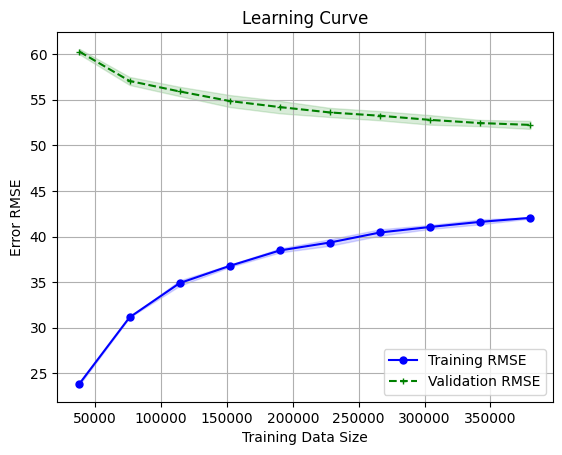

In [29]:
best_model = XGBRegressor(booster='gbtree',n_estimators=320, max_depth=9,learning_rate=0.1,subsample=1.0,objective= 'reg:squarederror',reg_alpha=0.8,reg_lambda=1.0,colsample_bytree=0.9,colsample_bylevel=0.9)

train_sizes, train_scores,val_scores = learning_curve(estimator=best_model,
                                                      X=Xtrain,
                                                      y = ytrain,
                                                      cv= 5,
                                                      train_sizes= np.linspace(0.1,1.0,10),
                                                      scoring= 'neg_mean_squared_error',
                                                      n_jobs=1)
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Finalmente, podemos aplicar el modelo final al set de datos de prueba para obtener las métricas finales

In [ ]:
xgb = XGBRegressor(booster='gbtree',n_estimators=320, max_depth=9,learning_rate=0.1,subsample=1.0,objective= 'reg:squarederror',reg_alpha=0.8,reg_lambda=1.0,colsample_bytree=0.9,colsample_bylevel=0.9)

y_pred = xgb.predict(Xtest)
#Calcular R^2
r2 = r2_score(ytest,y_pred)
#Calcular RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
# Mostrar  resultados
print(f'R^2: {r2:.4f}')
print(f'rmse:{rmse:.2f}')

Ahora vamos a realizar un modelo con apoyo de TSNE para reducción de dimensionalidad, esto para obtener insights de las variables que se interrelacionan entre sí

In [22]:
# Escalar datos y
scaler = StandardScaler()
y_scaled= scaler.fit_transform(y)

In [26]:
y_scaled_df = pd.DataFrame(y_scaled,columns=['scaled_target'])
scaled_df = pd.concat([X,y_scaled_df],axis =1)
scaled_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,...,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9,scaled_target
0,0.812735,-1.814181,0.638738,1.484528,-1.233439,-0.566588,0.414354,-2.021052,0.0,0.0,...,0,0,0,0,0,0,0,0,1,-0.547199
1,-0.890791,-1.612409,0.763566,1.539948,-1.102550,-0.441027,0.512508,-1.224245,0.0,0.0,...,0,0,0,0,0,0,0,0,1,-0.547199
2,1.301319,-1.706775,0.827715,1.745161,-1.068129,-0.316375,-0.516893,-2.344264,0.0,0.0,...,0,0,0,0,0,0,0,0,1,-0.547199
3,-3.590642,-0.706322,-0.800961,0.025471,-0.954515,-1.206674,4.279983,-3.877298,0.0,0.0,...,0,0,0,0,0,0,0,1,0,-0.635247
4,-6.868838,-0.830656,-0.449515,0.318054,-0.546366,-0.827182,3.805191,-0.950972,0.0,0.0,...,0,0,0,0,0,0,0,1,0,-0.635247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679159,2.719733,-1.087779,1.926290,-0.397498,0.247639,0.766519,-0.889125,-0.653163,0.0,0.0,...,0,1,0,0,0,0,0,0,1,-0.644052
679160,2.449231,0.059689,-0.171508,-1.914994,1.259741,1.038081,0.392547,0.047670,0.0,0.0,...,0,0,1,1,0,0,1,1,1,0.157180
679161,3.194923,1.025713,0.940067,-1.991741,0.057458,-0.345534,-0.358578,0.018728,0.0,0.0,...,0,1,0,1,1,1,0,1,0,-0.591223
679162,1.297617,0.189724,-0.649046,0.326053,0.180996,1.043675,-0.090841,0.051932,0.0,0.0,...,1,0,1,1,0,1,1,1,0,2.235100


In [ ]:
from sklearn.manifold import TSNE

#Aplicamos TSNE
tsne = TSNE(n_components = 3)
scaledtsne = tsne.fit_transform(scaled_df)

# 4. Visualizar los datos en 2D usando seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaledtsne[:, 0], y=scaledtsne[:, 1], hue=y, palette='viridis', s=50)
plt.title('Visualización de datos no supervisados con t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:

#from sklearn.decomposition import PCA
#from sklearn.datasets import load_iris
#
## Load data
#X, y = load_iris(return_X_y=True)
#
## Fit PCA
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X)
#
## Get feature names
#feature_names = pca.get_feature_names_out()
#print(feature_names)
#